Importando as bibliotecas necessárias para desenvolver os exercícios

In [5]:
import matplotlib.pyplot as plt
import numpy as np

Resolver o seguinte problema de Laplace
\begin{equation*}
\begin{cases}
    \nabla^2 U = 0 &\text{ para } \Omega\\
    U = 0 &\text{ para } \partial\Omega_{A, B, C}\\
    U = sen(2 \pi x) &\text{ para } \partial\Omega_{D}\\
  \end{cases}
\end{equation*}



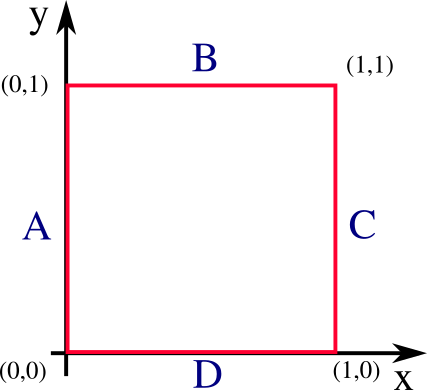

Resolvendo o problema de Laplace com condições de Dirichlet em todo o contorno matriz utilizando a matriz reduzida (m-2 variaveis)

[[-4.  1.  0. ...  0.  0.  0.]
 [ 1. -4.  1. ...  0.  0.  0.]
 [ 0.  1. -4. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -4.  1.  0.]
 [ 0.  0.  0. ...  1. -4.  1.]
 [ 0.  0.  0. ...  0.  1. -4.]]


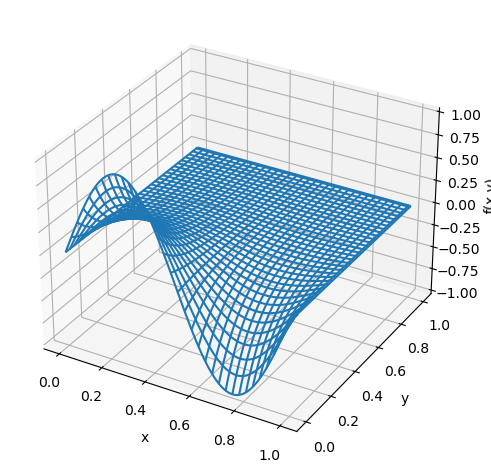

In [6]:
h = 0.01
x = np.arange(0, 1+h/2, h)
y = np.arange(0, 1+h/2, h)

u_a = 0 #dirichilet em omega_a
u_b = 0 #dirichilet em omega_b
u_c = 0 #dirichilet em omega_c
u_d = np.sin(2*np.pi*x) #dirichilet em omega_d

tam = len(x) - 2 #numero de incógnitas

#monta a matriz T de cada coluna do domínio
T = np.zeros((tam, tam))
T[0,0] = -2
T[0,1] = 1

for i in range(1,tam-1):
    T[i,i] = -2
    T[i,i+1] = 1
    T[i,i-1] = 1

T[tam-1, tam-1] = -2
T[tam-1, tam-2] = 1


I = np.eye(tam) #cria matriz identidade

#print(T, I)

#Monta a matriz A do sistema AU=F
A = np.kron(T,I) + np.kron(I,T)
print(A)
A = A*(1.0/(h**2))

#Cria o vetor F do sistema AU=F
f = np.zeros(tam*tam)

#incluindo condições de contorno no lado direito da equação, isto é vetor F
for i in range(tam):
    f[i+0*tam] = u_a #direita
    f[i + (tam-1)*(tam)] += u_b #esquerda
    f[(tam-1) + i*(tam)] += u_c # cima
    f[0 + i*(tam)] += u_d[i+1] #baixo

f /= -h**2

#resolve o sistema AU=F
u_sl = np.linalg.solve(A, f)


#inclui os pontos do contorno no vetor solução, agora em formato 2D para plotar o resultado
u=np.zeros((tam+2, tam+2))
for i in range(tam+2):
    u[i, 0] = u_a
    u[i, tam+1] = u_b
    u[tam+1, i] = u_c
    u[0, i] = u_d[i]

#copia a solução dos pontos internos para a matriz com o resultado a ser plotado
for i in range(1,tam):
    for j in range(1,tam):
        ii = i-1
        jj = j-1
        u[i,j] = u_sl[ii + tam*jj]


#plotando a solução...
x, y = np.meshgrid(x, y)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')  # Use add_subplot to create a 3D axes
ax.plot_wireframe(x, y, u)
#dando nomes aos eixos
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
plt.tight_layout()
plt.show()